In [46]:
# Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing data
data = pd.read_csv('advertising.csv')

In [5]:
# Displays First 5 rows in the dataset
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# Displays last 5 rows in the dataset
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
data.isna().sum() # Checks null values in the dataset. In our dataset there is no null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
# Displays total number of rows and columns in the data
data.shape
print('Total number of rows:',data.shape[0])
print('Total number of columns:',data.shape[1])

Total number of rows: 200
Total number of columns: 4


In [13]:
# Gives information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
data.describe() # Gives statistical values of the dataset

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


DATA CORRELATION

In [48]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


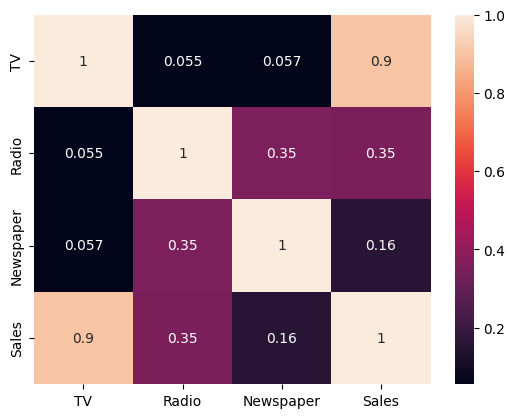

In [53]:
sns.heatmap(data.corr(), annot = True)
plt.show()

The variable TV seems to be most correlated with sales. The variable Radio also has a positive correlation with sales but weaker than TV. Newspaper variable has a relatively weak positive correlation with sales.

DATA VISUALIZATION

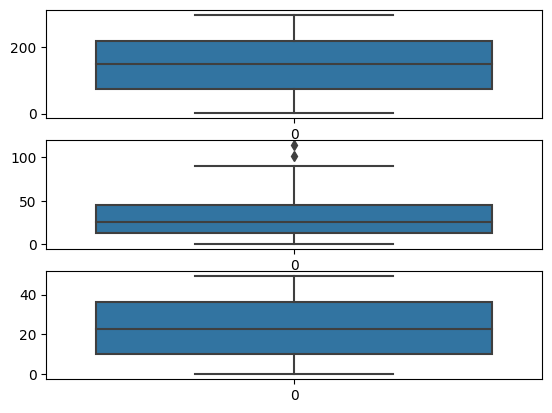

In [19]:
# checking for outliers
fig, ax = plt.subplots(3)
plt1 = sns.boxplot(data['TV'], ax = ax[0])
plt2 = sns.boxplot(data['Newspaper'], ax = ax[1])
plt3 = sns.boxplot(data['Radio'], ax = ax[2])
plt.show()

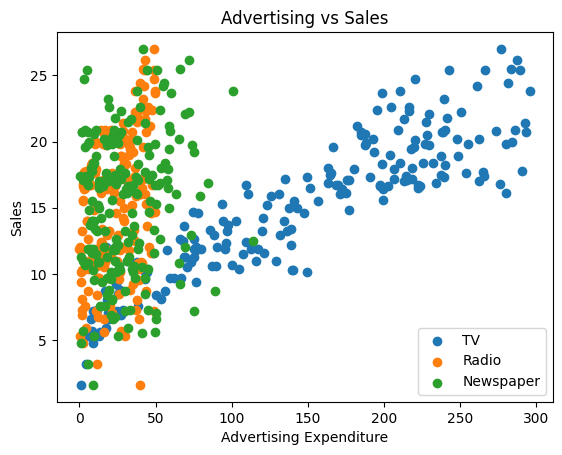

In [29]:
plt.scatter(data['TV'], data['Sales'], label = 'TV')
plt.scatter(data['Radio'], data['Sales'], label = 'Radio')
plt.scatter(data['Newspaper'], data['Sales'], label = 'Newspaper')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Advertising vs Sales')
plt.legend()
plt.show()

In [31]:
# Dividing X and Y parameters
X = data.drop(['Sales'], axis = 1)
y = data['Sales']

In [35]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [36]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [33]:
# Splitting data for Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


In [39]:
# Model building
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [40]:
lr_predict=lr_model.predict(X_test)

In [43]:
# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
mse = mean_squared_error(y_test, lr_predict)
r2 = r2_score(y_test, lr_predict)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.541624036229147
R-squared: 0.9091484341849799


In [47]:
# Make predictions
new_data = [[200,100,50]]
print("Predicted Sales:", lr_model.predict(new_data))

Predicted Sales: [26.12876513]
